In [142]:
import numpy as np
import scipy
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from scipy import stats

In [2]:
whiteset=pd.read_csv('winequality-white.csv')
whiteset.head()
whiteset.info()
whiteset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
redset=pd.read_csv('winequality-red.csv')
redset.head()
redset.info()
redset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
whiteset_added=whiteset
whiteset_added['type']='white'
whiteset_added.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
redset_added=redset
redset_added['type']='red'
redset_added.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
frames=[whiteset_added, redset_added]
dataset=pd.concat(frames)
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


(array([ 10.,   0.,   0.,   0.,  53.,   0.,   0.,   0., 681.,   0.,   0.,
          0., 638.,   0.,   0.,   0., 199.,   0.,   0.,  18.]),
 array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
        5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ]),
 <a list of 20 Patch objects>)

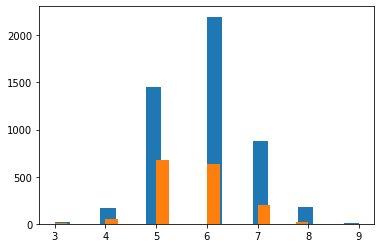

In [7]:
f,a = plt.subplots(1,1)
a.hist(dataset[dataset.type=='white'].quality, bins = 20)
a.hist(dataset[dataset.type=='red'].quality, bins = 20)

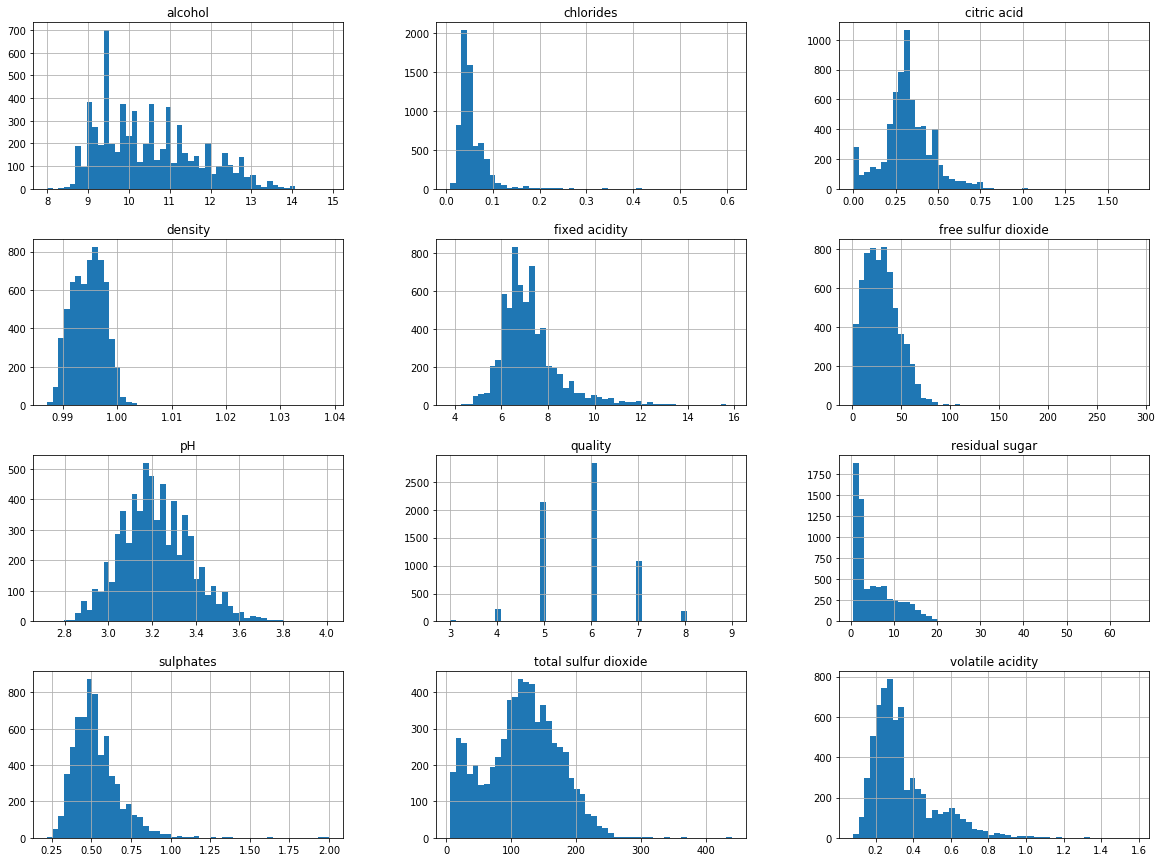

In [8]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

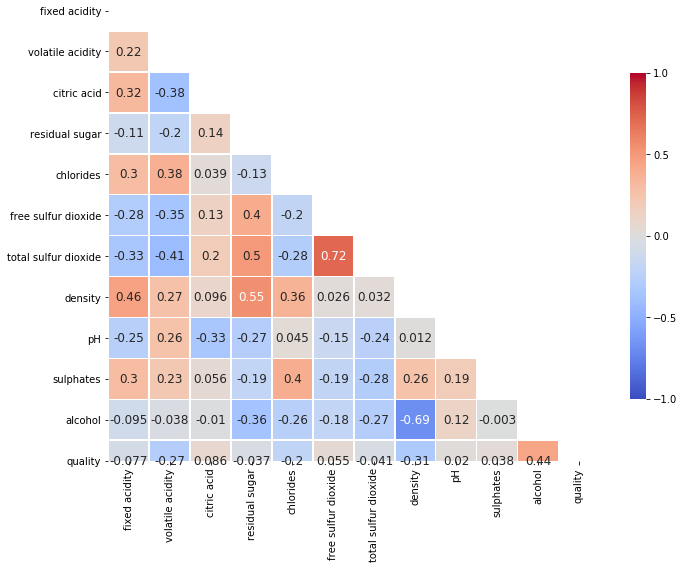

In [11]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

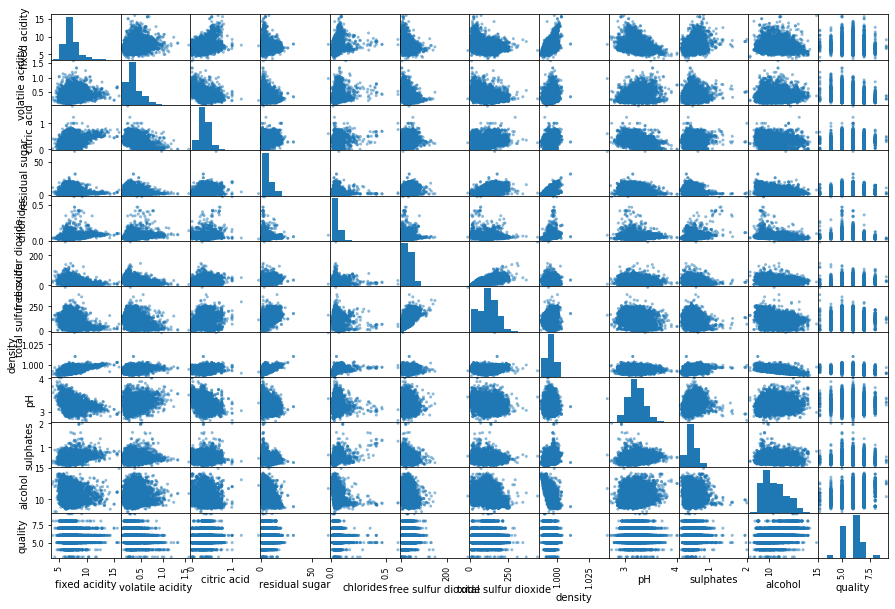

In [12]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(dataset, figsize=(15, 10))

In [13]:
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [14]:
dataset_y=dataset['quality']
dataset_x=dataset
dataset_x.drop(['quality'],axis=1,inplace=True)

In [15]:
# dataset=dataset[dataset.quality !=9]
# dataset=dataset.reset_index(drop=True)
# dataset['quality'].value_counts()

In [16]:
dataset_x_num = dataset.drop("type", axis=1)
dataset_x_cat=dataset[['type']]

In [17]:
# import sklearn
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for train_index, test_index in split.split(dataset, dataset["quality"]):
#     strat_train_set = dataset.iloc[train_index]
#     strat_test_set = dataset.iloc[test_index]
    
# X_train=pd.DataFrame(strat_train_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type']])
# X_test=pd.DataFrame(strat_test_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type']])

# y_train=strat_train_set.quality
# y_test=strat_test_set.quality

# print(y_train.value_counts())
# print(y_test.value_counts())

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# cat_encoder = OneHotEncoder(sparse=False)
# num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")),
#         ('std_scaler', StandardScaler()),
#     ])

# num_attribs = list(X_train.drop('type',axis=1))
# cat_attribs = ["type"]

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("cat", OneHotEncoder(), cat_attribs),
#     ])

In [19]:
cat_feats = dataset_x.dtypes[dataset_x.dtypes == "object"].index
num_feats = dataset_x.dtypes[dataset_x.dtypes != "object"].index


# Check skewness in num features
skewed_feats = dataset_x[num_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(33)


Skew in numerical features: 



,Skew
chlorides,5.398581
sulphates,1.796855
fixed acidity,1.722892
volatile acidity,1.494751
residual sugar,1.435073
free sulfur dioxide,1.219784
alcohol,0.565587
density,0.503485
citric acid,0.471622
pH,0.386749


In [20]:
temp=skewness['Skew']
temp=temp[abs(temp)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(temp.shape[0]))

from scipy.special import boxcox1p
skewed_features = temp.index
lam = 0.15
for feat in skewed_features:
    dataset_x[feat] = boxcox1p(dataset_x[feat], lam)

There are 6 skewed numerical features to Box Cox transform


In [21]:
dataset_x_withonehot = pd.get_dummies(dataset_x)
dataset_x_withonehot.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.440268          0.243353         0.36        3.910703   0.044163   
1          2.316039          0.267595         0.34        1.027379   0.048009   
2          2.617971          0.251488         0.40        2.423101   0.048969   
3          2.474062          0.210262         0.32        2.678075   0.056619   
4          2.474062          0.210262         0.32        2.678075   0.056619   
...             ...               ...          ...             ...        ...   
1594       2.297473          0.486968         0.08        1.194318   0.086737   
1595       2.240429          0.452981         0.10        1.270788   0.060426   
1596       2.316039          0.425114         0.13        1.307510   0.073654   
1597       2.240429          0.516792         0.12        1.194318   0.072714   
1598       2.259674          0.275570         0.47        1.714846   0.065167  

In [144]:
def AccWithTol(model,tol,X,y):
    y_pred=model.predict(X)
    accuracy = (numpy.abs(y_pred - y) < tol )
    np.mean(accuracy)
    dict={'Label':y_test,'Pred':y_pred,'T/F':accuracy}
    a=pd.DataFrame(dict)
    val_cnt = a.Label.value_counts().sort_index()
    val_cnt = val_cnt.to_numpy()
    correct_cnt = []
    acc = []
    for i in range(3,9):
        sub_class = a[a.Label==i]
        correct_cnt.append(np.sum(sub_class['T/F']))
        acc.append(correct_cnt[-1] / val_cnt[i-3])
    new_dict = {'label': np.arange(3,9),'val_cnt': val_cnt,'correct_cnt': correct_cnt, 'acc': acc}
    new_df = pd.DataFrame(new_dict)
    return new_df

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x_withonehot, dataset_y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



In [24]:
n_folds = 5

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf,error_score=np.nan))
    return(rmse)

In [137]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
lasso.fit(X_train,y_train)
AccWithTol(lasso,1,X_test,y_test)



Lasso score: mean 0.7400 std (0.0108)



,label,val_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,6,0.130435
2,5,420,388,0.923810
3,6,579,570,0.984456
4,7,221,166,0.751131
5,8,32,0,0.000000


In [138]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
ENet.fit(X_train,y_train)
AccWithTol(ENet,1,X_test,y_test)


score: mean 0.7400 std (0.0108)



,label,val_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,6,0.130435
2,5,420,388,0.923810
3,6,579,570,0.984456
4,7,221,166,0.751131
5,8,32,0,0.000000


In [139]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
KRR.fit(X_train,y_train)
AccWithTol(KRR,1,X_test,y_test)


score: mean 0.7212 std (0.0154)



,label,val_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,8,0.173913
2,5,420,394,0.938095
3,6,579,570,0.984456
4,7,221,164,0.742081
5,8,32,0,0.000000


In [140]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
GBoost.fit(X_train,y_train)
AccWithTol(GBoost,1,X_test,y_test)


score: mean 0.6605 std (0.0232)



,label,val_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,20,0.434783
2,5,420,398,0.947619
3,6,579,558,0.963731
4,7,221,186,0.841629
5,8,32,12,0.375000


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
        'n_estimators': randint(low=1000, high=10000),
        'max_features': randint(low=1, high=10),
        'min_samples_leaf':randint(low=5,high=20),
        'min_samples_split':randint(low=1,high=10) 
    }
grid_search = RandomizedSearchCV(estimator = GBoost,
                           param_distributions=param_distribs,
                            n_iter=10,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           random_state=42,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

In [29]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [141]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
averaged_models.fit(X_train,y_train)
AccWithTol(averaged_models,1,X_test,y_test)

 Averaged base models score: 0.6897 (0.0140)



,label,val_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,9,0.195652
2,5,420,402,0.957143
3,6,579,570,0.984456
4,7,221,174,0.787330
5,8,32,1,0.031250


In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


averaged_models.fit(X_train,y_train)
y_pred=averaged_models.predict(X_test)
y_pred=np.round(y_pred,0)
test_accuracies = accuracy_score(y_test,y_pred)
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, y_pred)
print('******Test set confusion matrix************')
print(cm_test)



Test set accuracy 0.5961538461538461
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  0   2  32  12   0   0]
 [  0   1 259 160   0   0]
 [  0   0  90 452  37   0]
 [  0   0   3 156  62   0]
 [  0   0   0  15  17   0]]


In [60]:
from sklearn.svm import SVR
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

/Users/mkhoi/.conda/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
y_pred=clf.predict(X_test)
accuracy = (numpy.abs(y_pred - y_test) < 1.0 )
np.mean(accuracy)
dict={'Label':y_test,'Pred':y_pred,'T/F':accuracy}
a=pd.DataFrame(dict)
val_cnt = a.Label.value_counts().sort_index()
val_cnt = val_cnt.to_numpy()
correct_cnt = []
acc = []
for i in range(3,9):
    sub_class = a[a.Label==i]
    correct_cnt.append(np.sum(sub_class['T/F']))
    acc.append(correct_cnt[-1] / val_cnt[i-3])
new_dict = {'label': np.arange(3,9),'val_cnt': val_cnt,'correct_cnt': correct_cnt, 'acc': acc}
new_df = pd.DataFrame(new_dict)
new_df

,label,val_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,3,0.065217
2,5,420,389,0.926190
3,6,579,572,0.987910
4,7,221,158,0.714932
5,8,32,1,0.031250
